In [1]:
import pickle
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Prepare data

In [4]:
with open('top_i_selected_list_and_true_tj.pkl', 'rb') as f:
    top_i_selected_eigenTj_dict = pickle.load(f)

phi_tilde = top_i_selected_eigenTj_dict['phi_tilde'][-1]
X = top_i_selected_eigenTj_dict['X']

In [6]:
print phi_tilde.shape
print X.shape

(800, 7)
(800, 2)


## Transform data into real type

In [8]:
X_aug = np.vstack((X,np.zeros(X.shape)))

pr = np.real(phi_tilde)
pi = np.imag(phi_tilde)

phi_aug = np.vstack((np.hstack((pr, -pi)),np.hstack((pi, pr))))

# # center and standaradize
X_aug -= X_aug.mean(axis=0)
X_aug /= X_aug.std(axis=0)

phi_aug -= phi_aug.mean(axis=0)
phi_aug /= phi_aug.std(axis=0)

In [9]:
print phi_aug.shape
print X_aug.shape

(1600, 14)
(1600, 2)


In [10]:
print X_aug.mean(axis=0), X_aug.std(axis=0)
print phi_aug.mean(axis=0), phi_aug.std(axis=0)

[7.26918525e-16 3.77087250e-15] [1. 1.]
[ 0.00000000e+00 -1.42108547e-16  0.00000000e+00  7.10542736e-17
  7.10542736e-17 -1.42108547e-16  3.55271368e-17  0.00000000e+00
  0.00000000e+00 -1.42108547e-16  7.10542736e-17  7.10542736e-17
 -1.42108547e-16  3.55271368e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# running elastnet, multitaskElasticNet, not enet_path

In [11]:
from sklearn.linear_model import ElasticNet, enet_path, lasso_path, MultiTaskElasticNet, Lasso

alpha_array = np.logspace(-16,1,200)
coef_list_1 = []
coef_list_2 = []
coef_list_1_m = [] 
coef_list_2_m = []
coef_list_1_l = [] 
coef_list_2_l = []

residual_list = []
residual_list_m = []
residual_list_l = []

for alpha in alpha_array:
    
    clf_l = Lasso(alpha=alpha, tol=1e-10, max_iter=3000, 
                     warm_start=False, random_state=1, fit_intercept=False)
    
    clf = ElasticNet(alpha=alpha, l1_ratio=0.5, tol=1e-10, max_iter=3000, 
                     warm_start=False, random_state=1, fit_intercept=False)
    
    clf_m = MultiTaskElasticNet(alpha=alpha, l1_ratio=0.5, tol=1e-10, max_iter=3000, 
                                warm_start=False, random_state=1, fit_intercept=False)
    # get fitted
    clf_m.fit(phi_aug, X_aug)
    clf.fit(phi_aug, X_aug)
    clf_l.fit(phi_aug, X_aug)
    
    # get predicted
    residual_list_m.append(np.linalg.norm(X_aug - clf_m.predict(phi_aug))**2/X_aug.shape[0])
    residual_list.append(  np.linalg.norm(X_aug - clf.predict(phi_aug))**2/X_aug.shape[0])
    residual_list_l.append(np.linalg.norm(X_aug - clf_l.predict(phi_aug))**2/X_aug.shape[0])
    
    coef_list_1.append(clf.coef_[0])
    coef_list_2.append(clf.coef_[1])
    coef_list_1_m.append(clf_m.coef_[0])
    coef_list_2_m.append(clf_m.coef_[1])
    coef_list_1_l.append(clf_l.coef_[0])
    coef_list_2_l.append(clf_l.coef_[1])

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:1819: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)


In [50]:
print np.dot(phi_aug, coef_list_1[0])
print X_aug

[ 2.45082317  2.44461956  2.4384276  ... -0.85669831 -0.85669831
 -0.85669831]
[[ 2.45082278  6.44576199]
 [ 2.44461925  6.29067787]
 [ 2.43842734  6.14092247]
 ...
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]]


Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

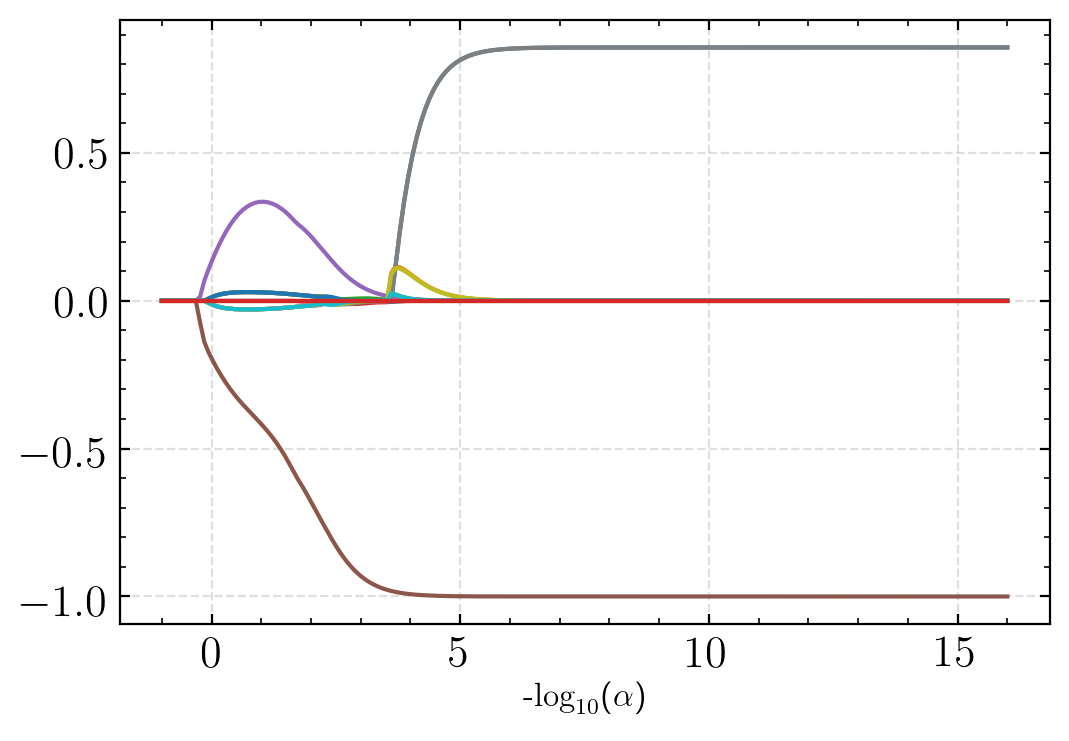

In [12]:
plt.plot(-np.log10(alpha_array), coef_list_1)
plt.xlabel(r'-$\log_{10}$($\alpha$)')

Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

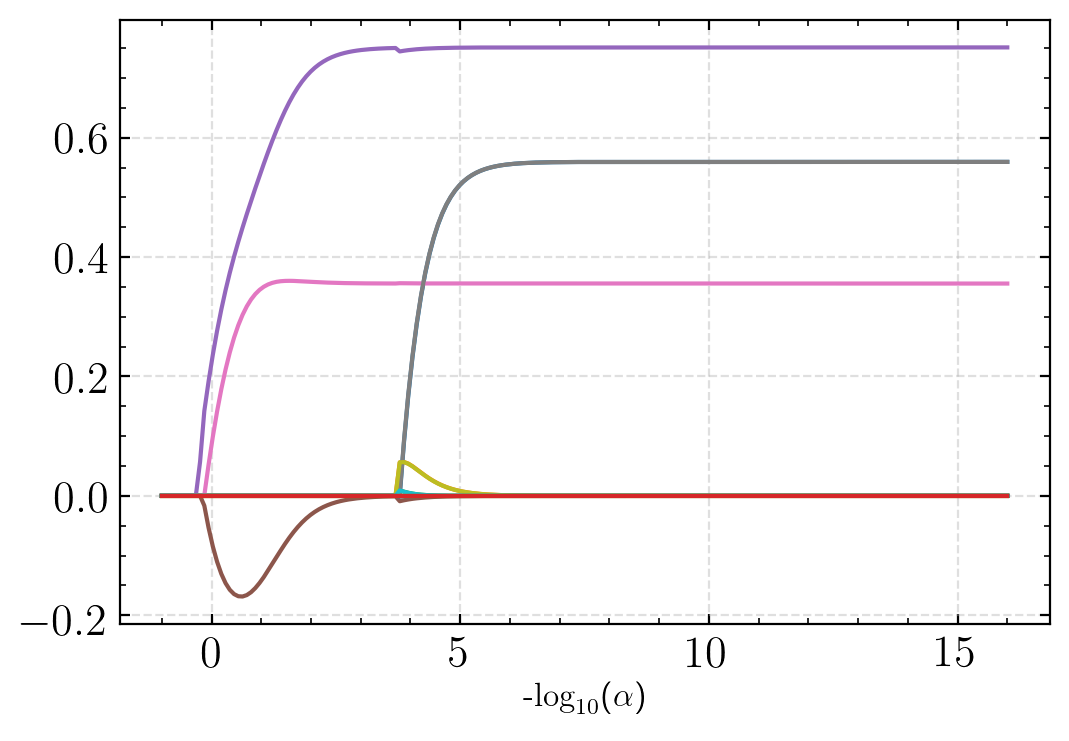

In [13]:
plt.plot(-np.log10(alpha_array), coef_list_2)
plt.xlabel(r'-$\log_{10}$($\alpha$)')

Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

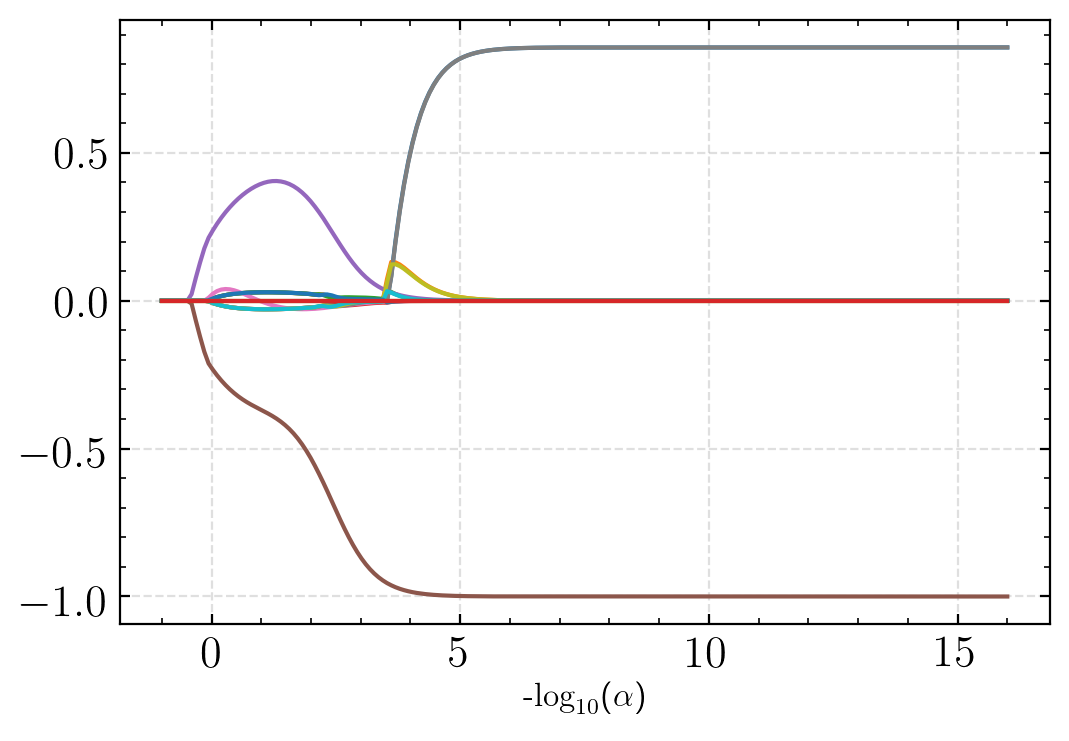

In [14]:
plt.plot(-np.log10(alpha_array), coef_list_1_m)
plt.xlabel(r'-$\log_{10}$($\alpha$)')


Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

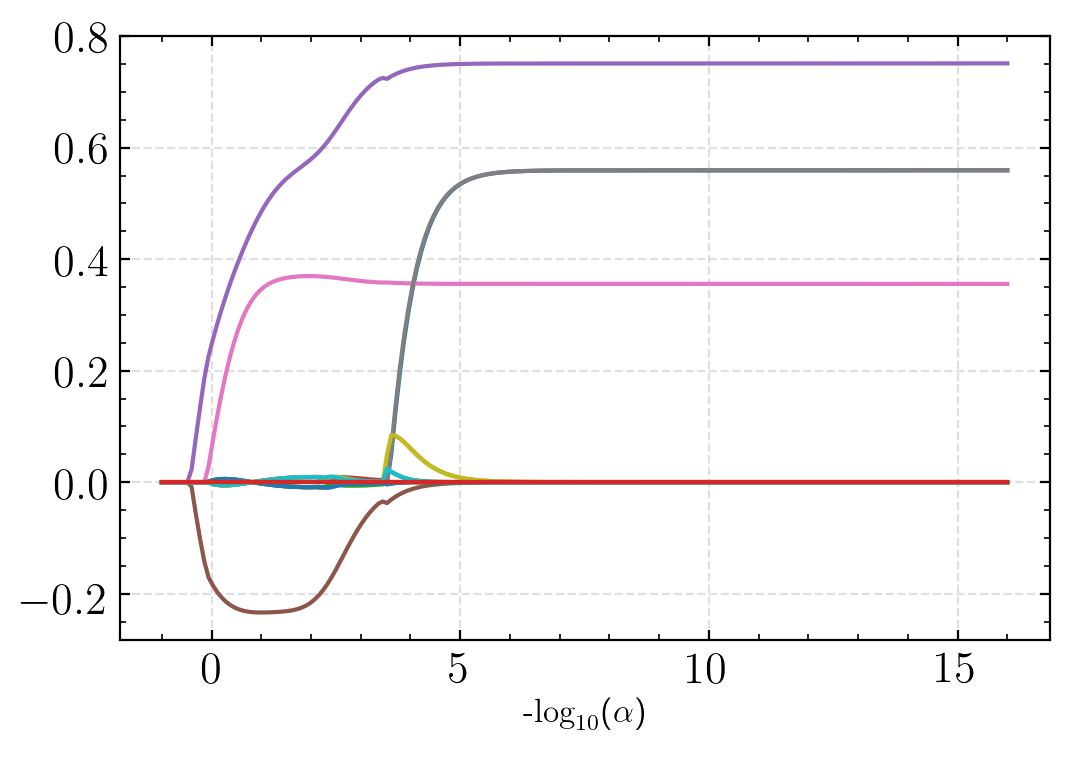

In [15]:
plt.plot(-np.log10(alpha_array), coef_list_2_m)
plt.xlabel(r'-$\log_{10}$($\alpha$)')

Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

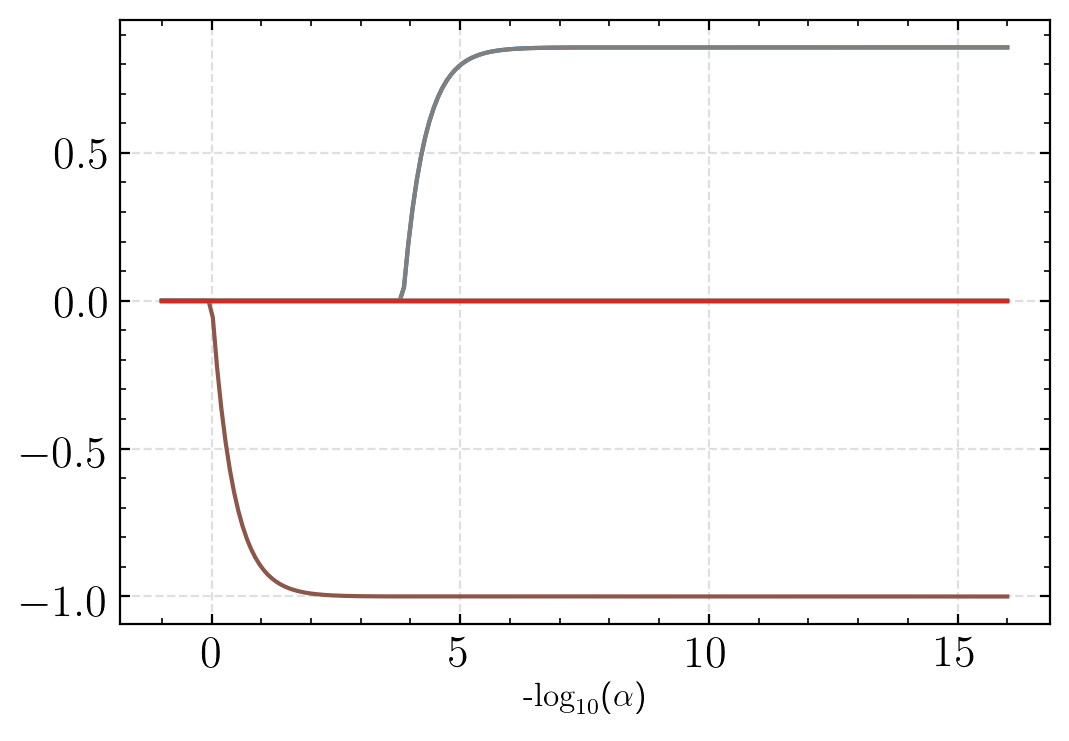

In [16]:
plt.plot(-np.log10(alpha_array), coef_list_1_l)
plt.xlabel(r'-$\log_{10}$($\alpha$)')

Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

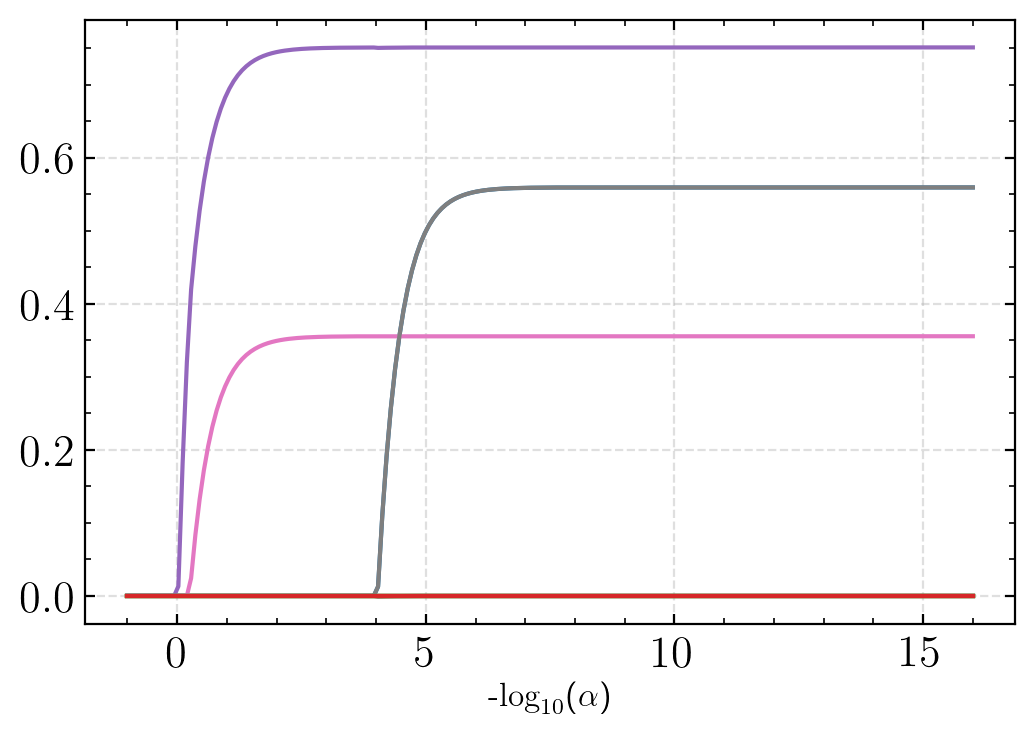

In [17]:
plt.plot(-np.log10(alpha_array), coef_list_2_l)
plt.xlabel(r'-$\log_{10}$($\alpha$)')

Text(0,0.5,'MSE')

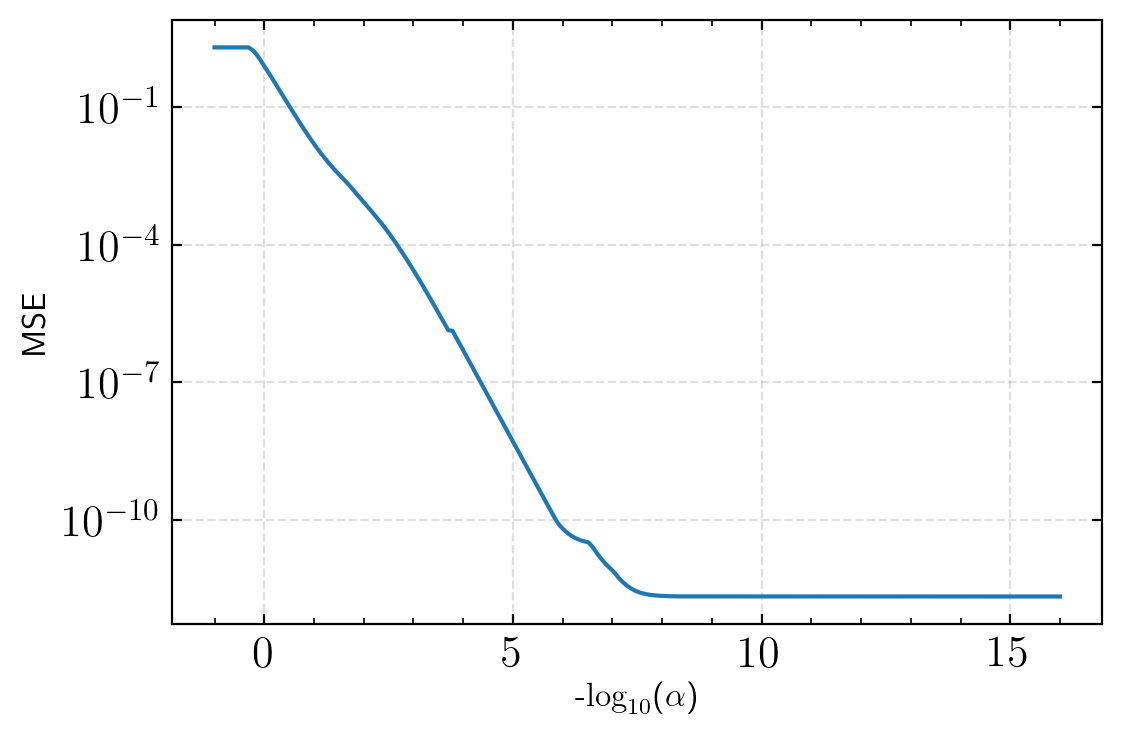

In [18]:

plt.semilogy(-np.log10(alpha_array), residual_list)
plt.xlabel(r'-$\log_{10}$($\alpha$)')
plt.ylabel('MSE')

Text(0,0.5,'MSE')

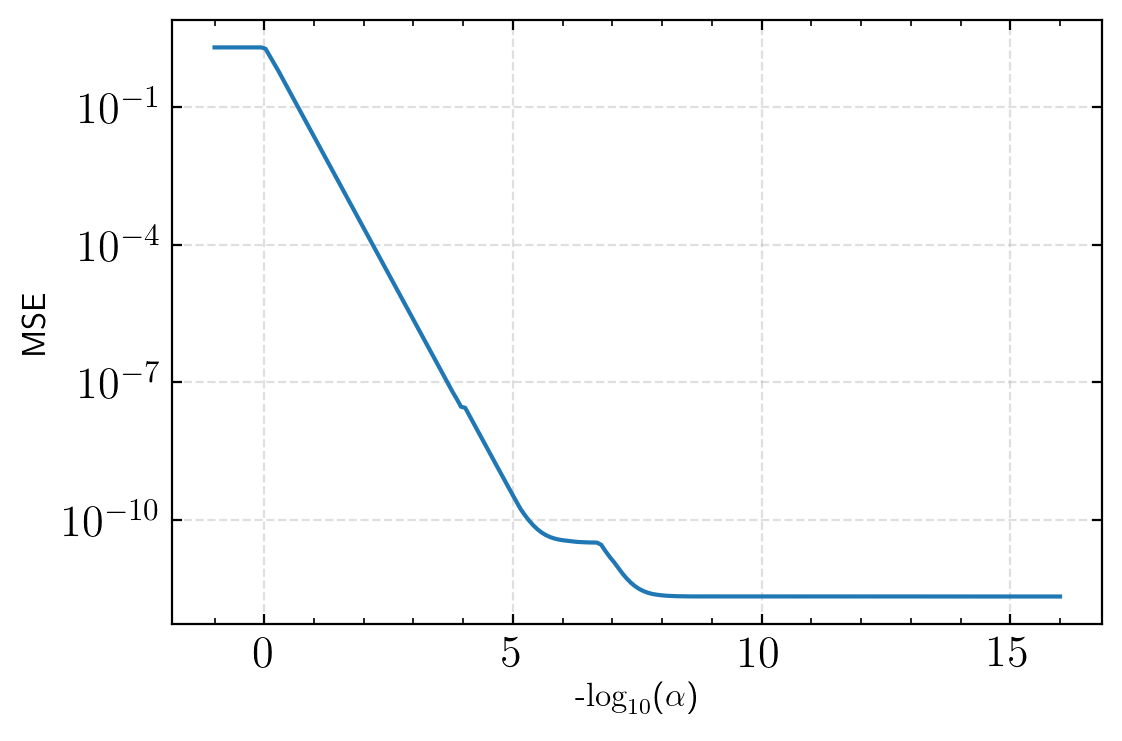

In [19]:

plt.semilogy(-np.log10(alpha_array), residual_list_l)
plt.xlabel(r'-$\log_{10}$($\alpha$)')
plt.ylabel('MSE')

Text(0,0.5,'MSE')

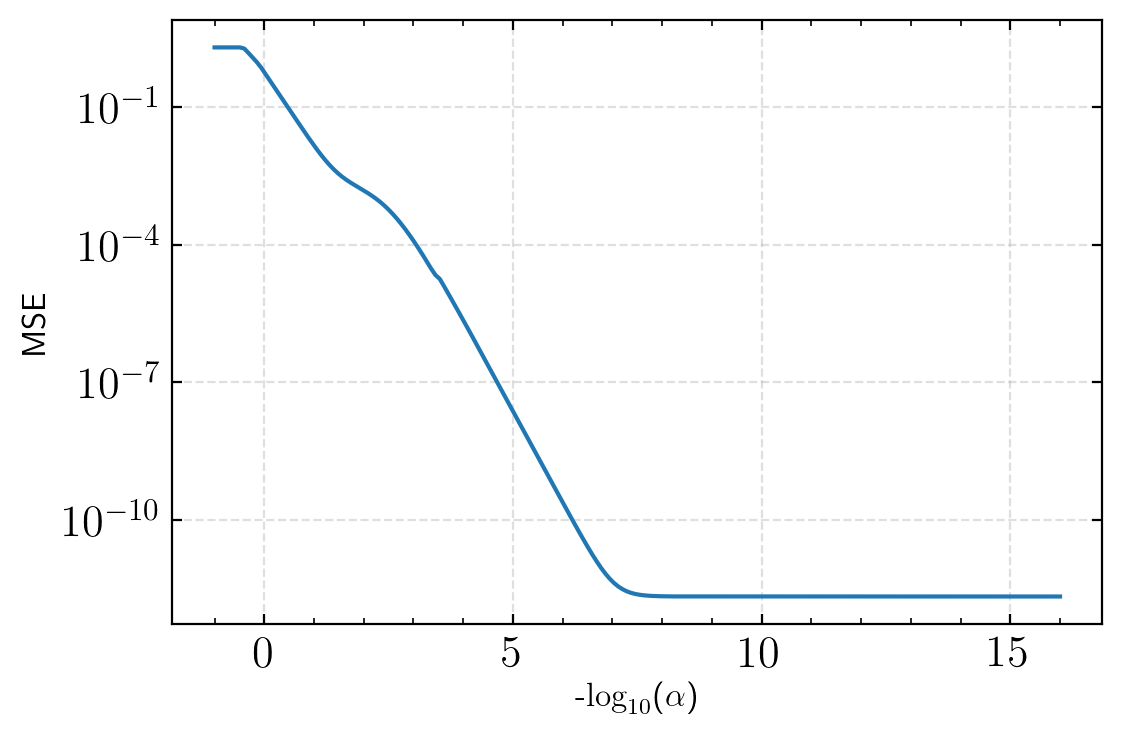

In [20]:

plt.semilogy(-np.log10(alpha_array), residual_list_m)
plt.xlabel(r'-$\log_{10}$($\alpha$)')
plt.ylabel('MSE')

# Run elastic-net path

In [21]:
enet_path?

In [22]:
alphas_enet, coefs_enet, _ = enet_path(phi_aug, X_aug, max_iter=3000, tol=1e-10, 
                                       alphas=np.logspace(-16,1,200),precompute=False,
                                       l1_ratio=0.5, random_state=1, fit_intercept=False)

In [23]:
phi_aug.shape

(1600, 14)

In [24]:
X_aug.shape

(1600, 2)

In [25]:
coefs_enet.shape

(2, 14, 200)

## check the parameters

### First component

In [26]:
for index,alpha in enumerate(alphas_enet):
    print '----'
    print 'alpha = ', alpha
    print coefs_enet[0,:,index].T

----
alpha =  10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  8.214343584919389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  6.747544053110686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  5.542664520663073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  4.552935074866938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  3.7399373024788014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  3.0721129988617464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  2.523539170434766
[ 0.          0.          0.          0.          0.0223294  -0.00959076
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
----
alpha =  2.072921779595361
[ 0.          0.          0.          0.          0.07763435 -0.06707389
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
----
alpha =  1.7027691722258977
[ 0.          0.          0.          0.          0.12

alpha =  1.289890261253308e-15
[-8.34832639e-09 -1.33042310e-12 -1.45051752e-16  6.98771240e-07
 -1.62676019e-05 -1.00001646e+00  2.57974330e-07  6.77406548e-07
  7.58575196e-11  6.55143649e-15 -9.69497430e-24  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
----
alpha =  1.0595601792776148e-15
[-8.34832645e-09 -1.33042310e-12 -1.45051732e-16  6.98771240e-07
 -1.62676624e-05 -1.00001646e+00  2.57980389e-07  6.77437791e-07
  7.58575199e-11  6.55143655e-15  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
----
alpha =  8.703591361485148e-16
[-8.34832647e-09 -1.33042310e-12 -1.45051702e-16  6.98771240e-07
 -1.62677224e-05 -1.00001646e+00  2.57986429e-07  6.77468833e-07
  7.58575202e-11  6.55143660e-15  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
----
alpha =  7.149428986597562e-16
[-8.34832645e-09 -1.33042310e-12 -1.45051669e-16  6.98771240e-07
 -1.62677821e-05 -1.00001646e+00  2.57992458e-07  6.77499642e-07
  7.58575204e-11  6.55143664e-15 -5.9459804

### Second component

In [27]:
for index,alpha in enumerate(alphas_enet):
    print '----'
    print 'alpha = ', alpha
    print coefs_enet[1,:,index].T

----
alpha =  10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  8.214343584919389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  6.747544053110686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  5.542664520663073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  4.552935074866938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  3.7399373024788014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  3.0721129988617464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----
alpha =  2.523539170434766
[ 0.          0.          0.          0.          0.02262448 -0.00823728
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
----
alpha =  2.072921779595361
[ 0.          0.          0.          0.          0.0794517  -0.05696954
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
----
alpha =  1.7027691722258977
[ 0.          0.          0.          0.          0.13

[ 7.96164088e-08  1.26880788e-11  1.38334096e-15 -1.42714351e-05
  7.51262046e-01  7.22142302e-05  3.55653243e-01 -6.19905510e-06
 -6.97801019e-10 -6.02656348e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
----
alpha =  4.1987070844439056e-15
[ 7.96164093e-08  1.26880788e-11  1.38334072e-15 -1.42714351e-05
  7.51262046e-01  7.22142964e-05  3.55653243e-01 -6.19908046e-06
 -6.97801019e-10 -6.02656365e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
----
alpha =  3.4489622604057525e-15
[ 7.96164097e-08  1.26880788e-11  1.38334071e-15 -1.42714351e-05
  7.51262046e-01  7.22143621e-05  3.55653243e-01 -6.19910566e-06
 -6.97801019e-10 -6.02656387e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
----
alpha =  2.8330961018393185e-15
[ 7.96164099e-08  1.26880788e-11  1.38334069e-15 -1.42714351e-05
  7.51262046e-01  7.22144275e-05  3.55653243e-01 -6.19913070e-06
 -6.97801019e-10 -6.02656405e-14  0.00000000e+00  0.00000000e+00
  0.000

## for each alpha, compute the corresponding residuals

In [28]:
residual_list = []
for index,alpha in enumerate(alphas_enet):
    residual = X_aug - np.dot(phi_aug,coefs_enet[:,:,index].T)
    residual_list.append(np.linalg.norm(residual)**2/residual.shape[0])

In [29]:
print X_aug.mean(axis=0)
print X_aug.std(axis=0)

[7.26918525e-16 3.77087250e-15]
[1. 1.]


In [30]:
print phi_aug.mean(axis=0)
print phi_aug.std(axis=0)

[ 0.00000000e+00 -1.42108547e-16  0.00000000e+00  7.10542736e-17
  7.10542736e-17 -1.42108547e-16  3.55271368e-17  0.00000000e+00
  0.00000000e+00 -1.42108547e-16  7.10542736e-17  7.10542736e-17
 -1.42108547e-16  3.55271368e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## result from single enet

In [65]:
np.vstack((coef_list_1[0], coef_list_2[0]))

array([[ 8.56698309e-01,  2.77268226e-15,  4.44881164e-22,
        -6.04310663e-12, -1.62654109e-05, -1.00001646e+00,
         2.57753770e-07,  8.56699693e-01, -6.56507704e-13,
        -0.00000000e+00,  1.92637519e-22, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00],
       [ 5.59483983e-01, -3.34866226e-15, -6.41806377e-20,
        -2.12648559e-12,  7.51262063e-01,  7.22375261e-05,
         3.55653242e-01,  5.59463423e-01,  6.84537437e-13,
         6.40916029e-17, -8.15091782e-19,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00]])

In [78]:
coef = np.vstack((coef_list_1[0], coef_list_2[0]))

In [79]:
print np.dot(phi_aug, coef.T)
print X_aug

[[ 2.45082317  6.4457503 ]
 [ 2.44461956  6.29066738]
 [ 2.4384276   6.14091314]
 ...
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]]
[[ 2.45082278  6.44576199]
 [ 2.44461925  6.29067787]
 [ 2.43842734  6.14092247]
 ...
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]]


In [71]:
phi_aug[]

(1600, 14)

## result from enet_path

In [75]:
coefs_enet[:,:,-1]

array([[-8.34832661e-09, -1.33042310e-12, -1.45051536e-16,
         6.98771240e-07, -1.62683596e-05, -1.00001646e+00,
         2.58050543e-07,  6.77798057e-07,  7.58575212e-11,
         6.55143686e-15,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.96164113e-08,  1.26880788e-11,  1.38333704e-15,
        -1.42714351e-05,  7.51262047e-01,  7.22154800e-05,
         3.55653243e-01, -6.19953407e-06, -6.97801020e-10,
        -6.02656687e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [54]:
print np.dot(phi_aug, coefs_enet[:,:,-1].T)
print X_aug

[[ 2.45082317  6.4457503 ]
 [ 2.44461956  6.29066738]
 [ 2.4384276   6.14091315]
 ...
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]]
[[ 2.45082278  6.44576199]
 [ 2.44461925  6.29067787]
 [ 2.43842734  6.14092247]
 ...
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]
 [-0.85669831 -0.55948398]]


## compare, so this is the reason!

In [83]:
np.linalg.norm(np.dot(phi_aug, coef.T - coefs_enet[:,:,-1].T))

6.430558080798743e-08

## check l1 norm differencen

In [141]:
print 'l1 norm of enet path ', np.linalg.norm(coefs_enet[:,:,-1].T[:,0],1)
print 'l1 norm of single run ', np.linalg.norm(coef.T[:,0],1)

l1 norm of enet path  1.0000343762857373
l1 norm of single run  2.7134309859501684


## check rank, it is certainly not full rnak

In [113]:
print np.linalg.matrix_rank(phi_aug)
print phi_aug.shape[1]

7
14


Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

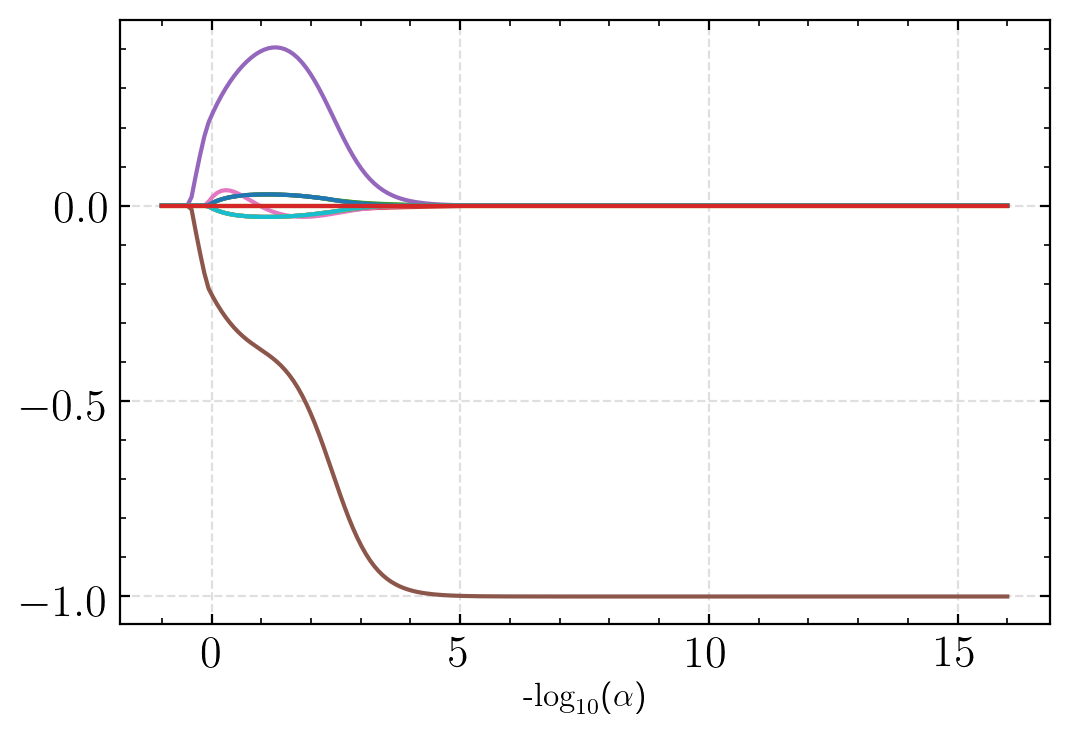

In [31]:
plt.plot(-np.log10(alphas_enet), coefs_enet[0,:,:].T)
plt.xlabel(r'-$\log_{10}$($\alpha$)')

Text(0.5,0,'-$\\log_{10}$($\\alpha$)')

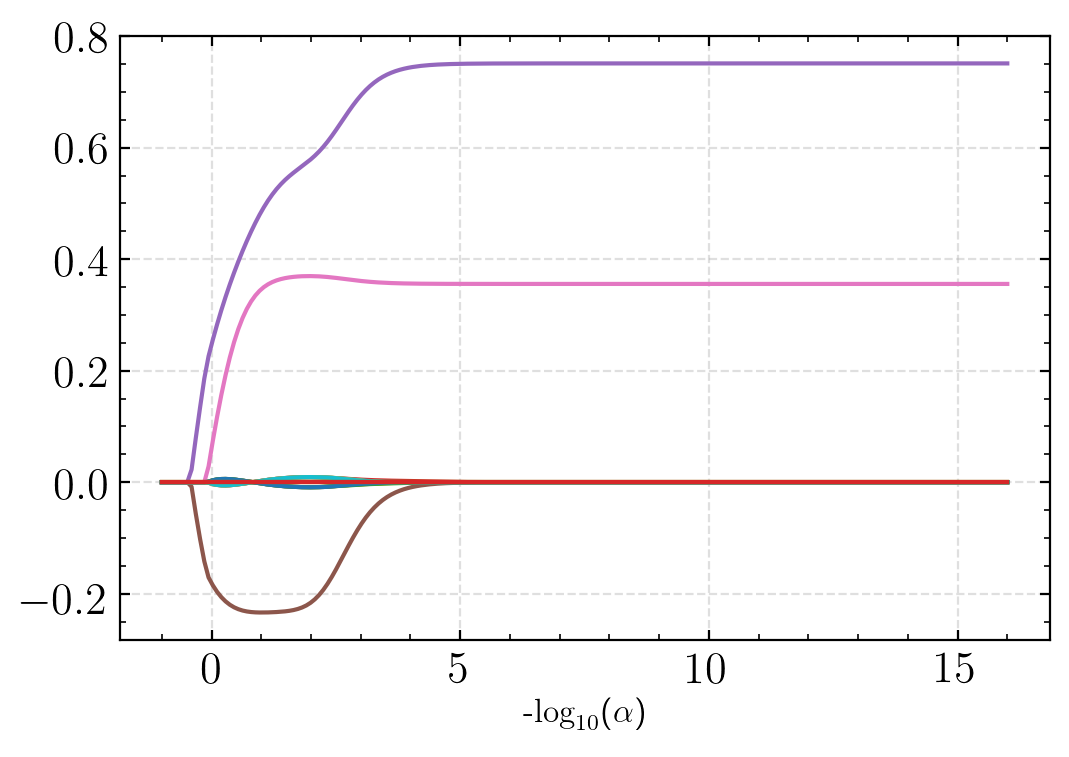

In [32]:
plt.plot(-np.log10(alphas_enet), coefs_enet[1,:,:].T)
plt.xlabel(r'-$\log_{10}$($\alpha$)')
# plt.ylim([-2,2])

Text(0,0.5,'MSE')

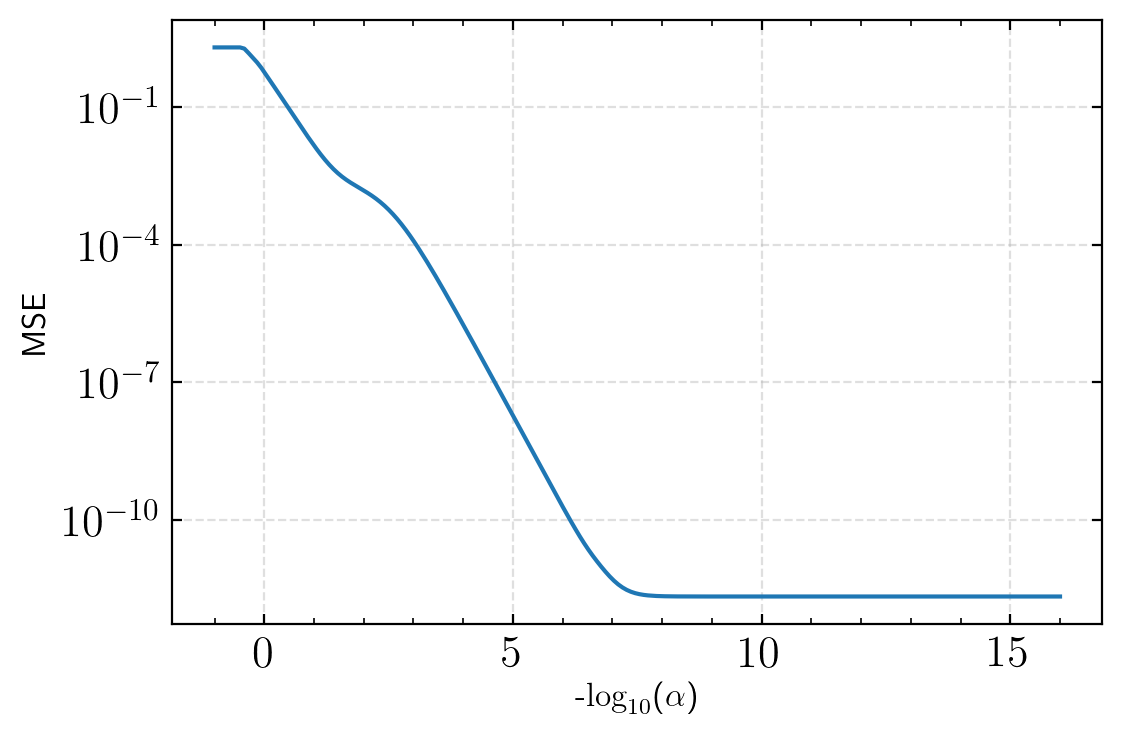

In [33]:
plt.semilogy(-np.log10(alphas_enet), residual_list)
plt.xlabel(r'-$\log_{10}$($\alpha$)')
plt.ylabel('MSE')

In [34]:
from itertools import cycle


plt.figure(figsize=(16,8))
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)

for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l.T, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e.T, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

NameError: name 'alphas_lasso' is not defined

<Figure size 3200x1600 with 0 Axes>

## Can we add CV on the above?

In [122]:
# result are too bad!

from sklearn.linear_model import ElasticNetCV, MultiTaskElasticNetCV

coef_list_enet_cv_1 = []
coef_list_enet_cv_2 = []



clf_enet_cv = MultiTaskElasticNetCV(alphas=alpha_array, tol=1e-10, max_iter=3000, cv=5, random_state=1, fit_intercept=False)

# get fitted
clf_enet_cv.fit(phi_aug, X_aug)






NameError: name 'residual_list_enet_cv' is not defined

## 1-norm

In [144]:
clf_enet_cv.coef_

array([[ 8.56698309e-01,  2.84097697e-15,  1.04153649e-23,
        -6.07419620e-12, -1.62654057e-05, -1.00001646e+00,
         2.57753286e-07,  8.56699693e-01, -9.63223870e-13,
        -6.44196243e-15,  1.31562904e-15,  0.00000000e+00,
         0.00000000e+00, -8.95844178e-17],
       [ 5.59483983e-01, -9.92494821e-16, -3.63850835e-24,
        -2.31969019e-12,  7.51262057e-01,  7.22286996e-05,
         3.55653242e-01,  5.59463427e-01,  5.03548992e-13,
         3.09473613e-15, -6.22750730e-16,  0.00000000e+00,
         0.00000000e+00,  6.88867663e-18]])

## so the norm for CV implemented is still not optimizing the l1 coefficients

In [145]:
np.linalg.norm(clf_enet_cv.coef_[0,:],1)

2.7134309859352936

# How about multiTask?

In [ ]:
# performance is bad

# How about using glmnet?

In [1]:
from glmnet import glmnet

ImportError: No module named glmnet